In [25]:
import numpy as np
import pandas as pd
import math
import os
import matplotlib.pyplot as plt
from matplotlib import style
from tqdm import tqdm
from PIL import Image
import tensorflow as tf

print(os.listdir('../input/flowers-recognition/flowers'))


['dandelion', 'daisy', 'flowers', 'sunflower', 'tulip', 'rose']


In [2]:
batch_size = 64
img_height = 150
img_width = 150

In [26]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "../input/flowers-recognition/flowers/flowers",
  validation_split=0.4,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4323 files belonging to 5 classes.
Using 2594 files for training.


In [27]:
validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "../input/flowers-recognition/flowers/flowers",
  validation_split=0.4,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4323 files belonging to 5 classes.
Using 1729 files for validation.


In [28]:
class_names = train_ds.class_names
plt.figure(figsize=(15, 15));

<Figure size 1080x1080 with 0 Axes>

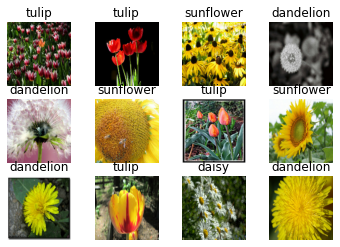

In [29]:
for img, label in train_ds.take(1):
    for i in range(12):
        ax = plt.subplot(3,4, 1 + i)
        plt.imshow(img[i].numpy().astype('uint8'))
        plt.title(class_names[label[i]])
        plt.axis("off")

In [30]:
from tensorflow.keras import layers

normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)


In [31]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [32]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = validation_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [33]:
num_classes = 5
model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, activation='linear'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [34]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [35]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=5
)

Epoch 1/5
41/41 [==============================] - 51s 1s/step - loss: 1.4239 - accuracy: 0.3554 - val_loss: 1.1946 - val_accuracy: 0.4991
Epoch 2/5
41/41 [==============================] - 45s 1s/step - loss: 1.1054 - accuracy: 0.5417 - val_loss: 1.1196 - val_accuracy: 0.5402
Epoch 3/5
41/41 [==============================] - 45s 1s/step - loss: 0.9840 - accuracy: 0.6123 - val_loss: 1.0737 - val_accuracy: 0.5668
Epoch 4/5
41/41 [==============================] - 44s 1s/step - loss: 0.8475 - accuracy: 0.6669 - val_loss: 1.0107 - val_accuracy: 0.5928
Epoch 5/5
41/41 [==============================] - 44s 1s/step - loss: 0.7331 - accuracy: 0.7153 - val_loss: 1.0219 - val_accuracy: 0.6102
